<a href="https://colab.research.google.com/github/pedsrc/data_science/blob/master/Analisando_dados_do_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---
  

# Panorama do COVID-19 no Brasil

Já tem algum tempo que os cientistas vem alertando sobre o risco de uma nova pandemia. Sendo uma pandemia um dos maiores riscos de matar milhões de pessoas, equivalente a grandes guerras, pois não estamos preparados para controlar-las, além disso uma pandemia pode provocar um fechamento ecônomico, aumentando ainda mais os problemas em um cenário global. 

Um vírus de origem animal quando passado para um humano é chamado de vírus zoonótico, e esse tipo de vírus causa cada vez causa mais surtos. Alguns exemplos foram o SARS em 2002 e o MERS em 2012, determinados como coronavírus (família de vírus que causam infecções respiratórias).

COVID-19 é uma doença infecciosa causada por um recém-descoberto coronavírus.

Segundo o [Ministério da Saúde](https://coronavirus.saude.gov.br/sobre-a-doenca'), "A COVID-19 é uma doença causada pelo coronavírus SARS-CoV-2, que apresenta um quadro clínico que varia de infecções assintomáticas a quadros respiratórios graves. De acordo com a Organização Mundial de Saúde (OMS), a maioria dos pacientes com COVID-19 (cerca de 80%) podem ser assintomáticos e cerca de 20% dos casos podem requerer atendimento hospitalar por apresentarem dificuldade respiratória e desses casos aproximadamente 5% podem necessitar de suporte para o tratamento de insuficiência respiratória (suporte ventilatório)".

Não se sabe muita coisa ainda a respeito do COVID-19, por se tratar de uma doença muito nova. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos. 

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/pedsrc/data_science/pedsrc-patch-covid/Corona-Virus-Infographic.jpg"></center>

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença. E em vez de descrever algo que ainda não é muito assertivo, vou mostrar as palavras mais usadas sobre a doença no Wikipedia, utilizando o WordCloud.

Wordcloud é um tipo de visualização de dados muito poderosa quando se fala de um trabalho com textos, ela destaca as palavras que aparecem com mais frequência, mostrando o protagonismo das mesmas.

Uma dificuldade quando se trabalha com `wordcloud` é a eliminação de preposições e pronomes, por exemplo.

Para a utilização é preciso instalar a biblioteca `wordcloud`.

## Obtenção dos Dados

Os dados utilizados para essa análise foram extraidos do site [https://github.com/owid/covid-19-data/tree/master/public/data](https://github.com/owid/covid-19-data/tree/master/public/data), dados esses disponibilizados publicamente pelo [Our World in Data](https://ourworldindata.org/coronavirus) e atualizados diariamente.

O arquivo de dados utilizado para estudo foi o seguinte:
* `owid-covid-data.csv`

Sendo utilizada a atualização do dia **20/06/2020**.

A `wordcloud` será feita com o artigo sobre COVID-19 do [Wikipedia](https://pt.wikipedia.org/wiki/COVID-19).

Os dados utilizados para o `wordcloud` foram adaptados para um csv e tratados no excel, de modo a ter uma única coluna de dados com as palavras do artigo, nesse caso, foi necessário codificar algumas linhas que apresentavam erros de codificação e ignorar alguns erros pertinentes. O link do csv se encontra no meu [github](https://raw.githubusercontent.com/pedsrc/data_science/pedsrc-patch-covid/wikipedia_covid.csv).

O mais difícil de se analisar dados de doenças emergentes são os conflitos de dados entre os governos federais, estaduais e os dados não oficiais. Além disso há dados disponibilizados de todo o mundo o que dificulta ainda mais o tratamento e a confiança dos dados.

### Dicionário de Variáveis

* `iso_code` - código dos países composto por três letras 
* `continent` - localização geográfica do continente
* `location` - localização geográfica
* `date` - data de observação
* `total_cases` - número total de casos confirmados para COVID-19
* `new_cases` - número de novos casos confirmados para COVID-19
* `total_deaths` - número total de mortos confirmados atribuídos ao COVID-19
* `new_deaths` - número de novos mortos confirmados atribuídos ao COVID-19
* `total_cases_per_million` - número total de casos confirmados para COVID-19 por milhão de pessoas
* `new_cases_per_million` - número de novos casos confirmados para COVID-19 por milhão de pessoas
* `total_deaths_per_million` - número total de mortos confirmados abribuídos ao COVID-19 por milhão de pessoas
* `new_deaths_per_million` - número de novos mortos confirmados atribuídos ao COVID-19 por milhão de pessoas
* `total_tests` - número total de testes de COVID-19
* `new_tests` - número de novos testes de COVID-19
*  `new_tests_smoothed` - novos testes para COVID-19 (suavizado por 7 dias). Para países que não relatam dados de teste diariamente, assumimos que o teste mudou igualmente diariamente em qualquer período em que nenhum dado foi relatado. Isso produz uma série completa de números diários, que são calculados em média em uma janela de 7 dias consecutivos
*  `total_tests_per_thousand` - total de testes para COVID-19 por mil pessoas
*  `new_tests_per_thousand` - novos testes para COVID-19 por mil pessoas
*  `new_tests_smoothed_per_thousand` - Novos testes para COVID-19 (suavizado por 7 dias) por mil pessoas
*  `tests_units` - unidades usadas pelo local para relatar seus dados de teste
*  `stringency_index` - índice de rigor da resposta do governo: medida composta com base em 9 indicadores de resposta, incluindo fechamento de escolas, fechamento de locais de trabalho e proibições de viagens, redimensionada para um valor de 0 a 100 (100 = resposta mais estrita)
*  `population` - população em 2020
*  `population_density` - número de pessoas divididas por área terrestre, medida em quilômetros quadrados, no ano mais recente disponível
*  `median_age` - idade média da população, projeção da ONU para 2020
*  `aged_65_older` - percentagem da população com 65 anos ou mais, ano mais recente disponível
*  `aged_70_older` - percentagem da população que tem 70 anos ou mais em 2015
*  `gdp_per_capita` - produto interno bruto com paridade do poder de compra (dólares internacionais constantes de 2011), último ano disponível
*  `extreme_poverty` - percentagem da população que vive em extrema pobreza, último ano disponível desde 2010
*  `cvd_death_rate` - taxa de mortalidade por doenças cardiovasculares em 2017
*  `diabetes_prevalence` - prevalência de diabetes (% da população de 20 a 79 anos) em 2017
*  `female_smokers` - percentagem de mulheres que fumam, no ano mais recente disponível
*  `male_smokers` - percentagem de homens que fuma, último ano disponível
*  `handwashing_facilities` - parcela da população com instalações básicas de lavagem das mãos nas instalações, último ano disponível
*  `hospital_beds_per_thousand` - camas hospitalares por 1.000 pessoas, ano mais recente disponível desde 2010
*  `life_expectancy` - expectativa de vida no nascimento em 2019


Importando os dados do COVID-19 e instalando as bibliotecas necessárias

In [ ]:
# instalar as bilbiotecas necessárias
!pip install wordcloud -q

In [ ]:
# importar as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns

# importar o dataset COVID-19 para um DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")
df_word = pd.read_csv("https://raw.githubusercontent.com/pedsrc/data_science/pedsrc-patch-covid/wikipedia_covid.csv",encoding='latin-1', error_bad_lines=False)
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Análise Exploratória dos Dados

Para iniciar a análise é preciso verificar como o nosso dataset está estruturado, observando qual o seu tamanho, seus tipos de variáveis e se precisa ser tratado.
Após a primeira análise, vamos identificar quais são os pontos mais interessantes do dataset que devemos estudar para a criação de análises impactantes.


Para iniciar o estudo, é preciso verificar a "cara" do dataset.

In [ ]:
# mostrar as 5 primeiras linhas do dataset
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


Já sabendo como se comporta o conjunto de dados, podemos começar a extrair algumas informações básicas.

O mesmo comporta **24742 linhas e 34 colunas**.

In [ ]:
# mostrar o tamanho do dataset
df.shape

(24742, 34)

As extração das colunas é importante para ter uma primeira abordagem do que podemos analisar.

In [ ]:
# mostrar as colunas disponíveis no dataset
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

O tipo de variável é uma informação muito importante para seguir com a análise, pois aqui podemos observar o tipo de informação com a qual estamos trabalhando.

In [ ]:
# mostrar o tipo das variáveis
df.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                           int64
population_density                 float64
median_age                         float64
aged_65_old

Continuando com o estudo, é interessante verificar se há algum dado nulo ou ausente.

In [ ]:
# verificar a porcentagem de valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

new_tests                          0.744402
new_tests_per_thousand             0.744402
total_tests_per_thousand           0.717767
total_tests                        0.717767
new_tests_smoothed_per_thousand    0.694043
new_tests_smoothed                 0.694043
tests_units                        0.669105
handwashing_facilities             0.589403
extreme_poverty                    0.394390
male_smokers                       0.270673
female_smokers                     0.262267
stringency_index                   0.186565
hospital_beds_per_thousand         0.159607
gdp_per_capita                     0.096637
aged_65_older                      0.095869
aged_70_older                      0.087705
median_age                         0.083017
cvd_death_rate                     0.082410
diabetes_prevalence                0.052381
population_density                 0.036982
life_expectancy                    0.011438
new_deaths_per_million             0.009134
total_deaths_per_million        

Após essa primeira análise foi possível verificar que o coluna `date` é do tipo `object` e desse modo não pode ser trabalhada como data, é preciso transforma-lá no formato `datetime`.

In [ ]:
# transformar a coluna date no tipo datetime
df.date = pd.to_datetime(df.date)

Agora, já é possível escolher o que queremos estudar.
No primeiro momento vamos analisar quais são os 5 países que apresentam o maior número de casos de COVID-19 no dia 20/06/2020 (data do csv utilizado para as análises).

In [ ]:
# verificar quais países tem o maior número de casos para COVID-19
df.loc[df.date == '2020-06-20', ['location', 'total_cases']].sort_values(by="total_cases", ascending=False)[1:6]

,location,total_cases
23701,United States,2220961.0
3404,Brazil,1032913.0
18963,Russia,569063.0
10598,India,395048.0
23528,United Kingdom,301815.0


Vamos também verificar quais os 5 países com o maior número de mortes.

In [ ]:
# verificar quais países tem o maior número de mortes por COVID-19
top5_total_deaths = df.loc[df.date == "2020-06-20", ['location', 'total_cases', 'total_deaths']].sort_values(by='total_deaths', ascending=False)[1:6]
top5_total_deaths

,location,total_cases,total_deaths
23701,United States,2220961.0,119112.0
3404,Brazil,1032913.0,48954.0
23528,United Kingdom,301815.0,42461.0
11718,Italy,238011.0,34561.0
8185,France,159452.0,29617.0


Com a tabela montada, vamos gerar um gráfico de barras com o número total de mortes para visualizar melhor os resultados.

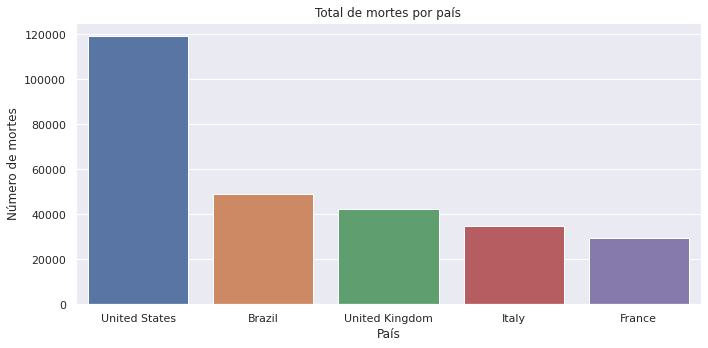

In [ ]:
# plotar o gráfico dos 5 países com maior número de mortes 
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot('location', 'total_deaths', data=top5_total_deaths)
ax.set_xlabel("País")
ax.set_ylabel("Número de mortes")
ax.set_title("Total de mortes por país")

plt.tight_layout()

Para uma análise um pouco mais complexa, vamos verificar para esses 5 mesmos países a evolução no tempo do número total de mortes.

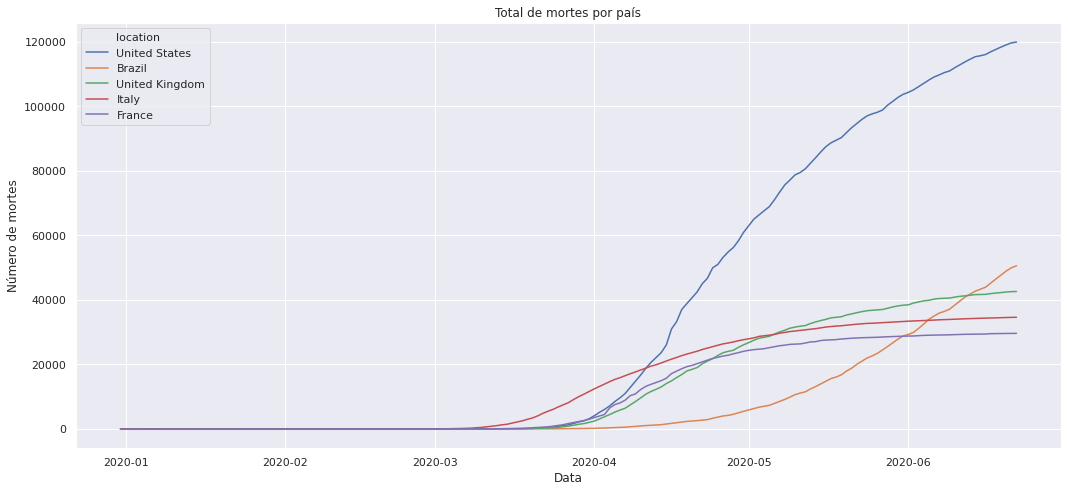

In [ ]:
# selecionar os 5 países com o maior número de mortes
top5_deaths = df.copy()
top5_deaths.set_index('location', inplace = True)
top5_deaths = top5_deaths.loc[['United States', 'Brazil', 'United Kingdom', 'Italy', 'France']]
top5_deaths = top5_deaths.reset_index()
top5_deaths.date = pd.to_datetime(top5_deaths.date)

# plotar o gráfico de linha
fig, ax = plt.subplots(figsize=(15,7))

ax = sns.lineplot(x='date', y="total_deaths", hue="location", data=top5_deaths);
ax.set_xlabel("Data")
ax.set_ylabel("Número de mortes")
ax.set_title("Total de mortes por país")

plt.tight_layout()

Vamos fazer a mesma análise para o número total de casos.

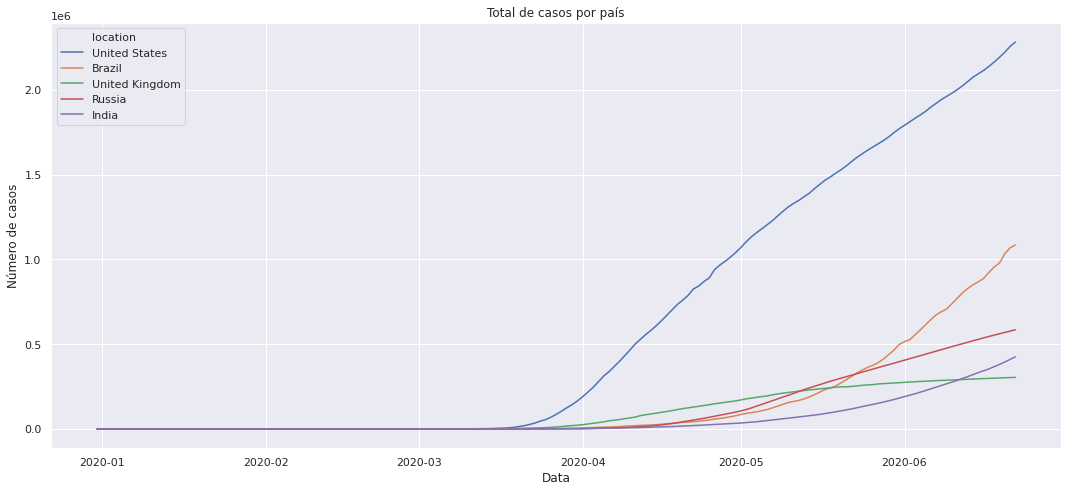

In [ ]:
# selecionar os 5 países com o maior número de casos
top5_cases = df.copy()
top5_cases.set_index('location', inplace = True)
top5_cases = top5_cases.loc[['United States', 'Brazil', 'United Kingdom', 'Russia', 'India']]
top5_cases = top5_cases.reset_index()
top5_cases.date = pd.to_datetime(top5_cases.date)

# plotar o gráfico de linha
fig, ax = plt.subplots(figsize=(15,7))

ax = sns.lineplot(x='date', y="total_cases", hue="location", data=top5_cases);
ax.set_xlabel("Data")
ax.set_ylabel("Número de casos")
ax.set_title("Total de casos por país")

plt.tight_layout()

Agora, vamos analisar o número total de casos no mundo.

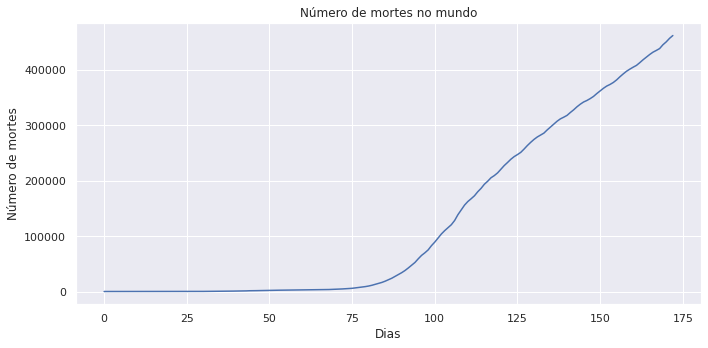

In [ ]:
# filtrar a localização "mundo" e plotar o gráfico
plt.figure(figsize=(10,5))
df.loc[df.location == "World", "total_deaths"].reset_index(drop=True).plot()
plt.xlabel('Dias')
plt.ylabel('Número de mortes')
plt.title('Número de mortes no mundo')

plt.tight_layout()

Uma análise não muito conclusiva, mas que não deixa de ser interessante é verificar se o PIB per capita tem alguma influência no número total de mortes.

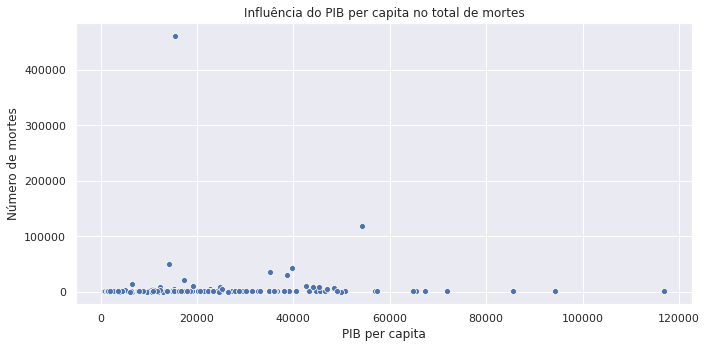

In [ ]:
# plotar o gráfico de dispersão
df_atual = df.loc[df.date == "2020-06-20"]
fig, ax = plt.subplots(figsize=(10,5))
ax= sns.scatterplot('gdp_per_capita', 'total_deaths', data=df_atual)
ax.set_xlabel("PIB per capita")
ax.set_ylabel("Número de mortes")
ax.set_title("Influência do PIB per capita no total de mortes")

plt.tight_layout()

### Análise Exploratória para o Brasil

Nesse segundo momento, vamos focar nossas análises no Brasil e estudar quais insights podemos extrair.

O primeiro passo é criar uma cópia do dataset inicial, filtrando somente o Brasil.




In [ ]:
# copiar o dataset inicial e filtrar o Brasil
df_brasil = df.loc[df.location == "Brazil"].copy()
df_brasil = df_brasil.reset_index()
df_brasil.date = pd.to_datetime(df_brasil.date)
df_brasil.set_index('date', inplace = True)

Com os dados que temos, é possível verificar quando foi registrado o primeiro caso de COVID-19 no Brasil e também a primeira morte.

In [ ]:
# verificar a data da primeira morte por COVID-19
primeira_morte = df_brasil.loc[df_brasil.total_deaths == 1,['total_deaths']].sort_values(by='date', ascending=True)
primeira_morte.head(1)

,total_deaths
date,
2020-03-18,1.0


In [ ]:
# verificar a data do primeiro caso de COVID-19
primeiro_caso = df_brasil.loc[df_brasil.total_cases == 1,['total_cases']].sort_values(by='date', ascending=True)
primeiro_caso.head(1)

,total_cases
date,
2020-02-26,1.0


É possível observar que o primeiro caso registrado foi no dia **26/02/2020** equanto a primeira morte foi registrada no dia **18/03/2020**, sendo um intervalo de 21 dias entre o primeiro caso e a primeira morte.

Vamos agora plotar e analisar as curvas de número total de casos e número total de mortes em escalas linear e logarítmica para verificar como está a evolução do COVID-19 no Brasil.


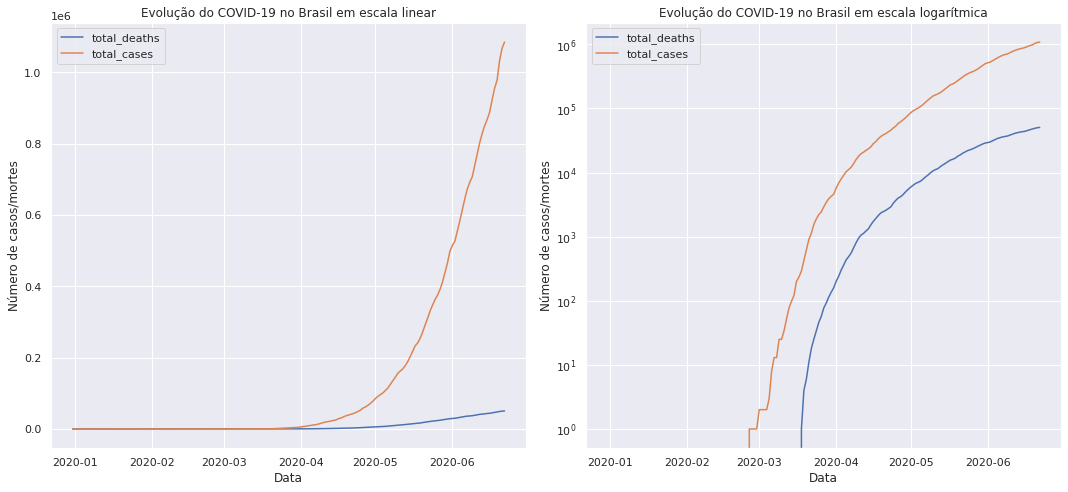

In [ ]:
# plotar a curva de evolução em escala linear
fig, ax = plt.subplots(nrows = 1, ncols =2, figsize=(15,7))
ax[0].plot('total_deaths', data=df_brasil)
ax[0].plot('total_cases', data=df_brasil)
ax[0].set_xlabel("Data")
ax[0].set_ylabel("Número de casos/mortes")
ax[0].set_title("Evolução do COVID-19 no Brasil em escala linear")
ax[0].legend()

# plotar a curva de evolução em escala logarítmica
ax[1].plot('total_deaths', data=df_brasil)
ax[1].plot('total_cases', data=df_brasil)
plt.yscale("log")
ax[1].set_xlabel("Data")
ax[1].set_ylabel("Número de casos/mortes")
ax[1].set_title("Evolução do COVID-19 no Brasil em escala logarítmica")
ax[1].legend()

plt.tight_layout()

### WordCloud

Relembrando, que os dados utilizados para o `wordcloud` foram os dados sobre COVID-19 do Wikipedia. Esses mesmos dados foram trasformados em um csv contendo todo o texto do artigo.

O primeiro passo, como feito anteriormente é avaliar a "cara" do nosso dataset e verificar se o mesmo está adequado para o ínico da análise.

In [ ]:
# verificar as 5 primeiras entradas do dataset
df_word.head()

,text
0,Origem: Wikipédia a enciclopédia livre.
1,Saltar para a navegaçãoSaltar para a pesquisa
2,Nota: Este artigo é sobre a doença. Para o ví...
3,Este artigo ou se(c)ção é sobre um evento atua...
4,COVID-19


Agora vamos verificar se temos algum valor ausente para a coluna `text`e removê-los.

In [ ]:
# verificar se há valores ausentes
print("Valores ausentes para word: ", df_word.text.isnull().sum())

# remover as linhas com valores ausentes para a coluna text
text = df_word.dropna(subset=['text'], axis=0)['text']

Valores ausentes para word:  0


Para a criação da `wordcloud` iremos concatenar todas as `strings` de modo a formar uma única `string`.

In [ ]:
# concatenar todas as strings
all_text = " ".join(s for s in text)

# verificar a quantidade de palavras 
print("Quantidade de Palavras: {}".format(len(all_text)))

Quantidade de Palavras: 37484


É importante como falado anteriormente eliminar algumas palavras pertinentes que podem prejudicar análise como pronomes e preposições, além disso, vamos escolher uma imagem do assunto (disponível no meu [github](https://github.com/pedsrc/data_science/blob/pedsrc-patch-covid/infocovid.png)), fazer o download e utilizá-la como molde para a nuvem de palavras.
Por fim, vamos gerar a `wordcloud` em cima dessa imagem.

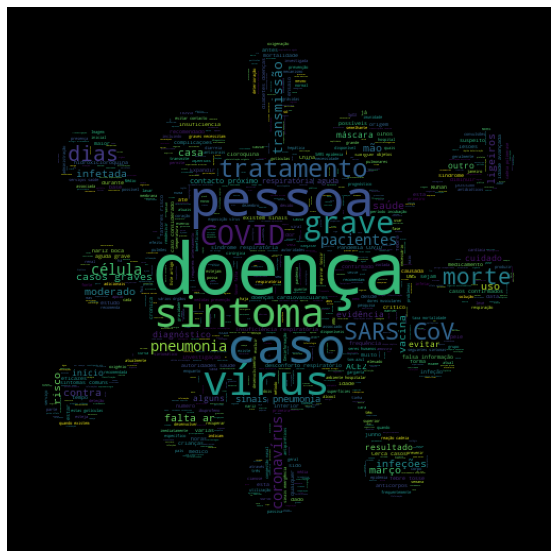

In [ ]:
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["da","meu","em","você","de","ao","os","se","uma","como","para","são","ou","que","não","na","ser","pode","putro","estão","após","por","dos","das","entre","pelo","pela","um","podem","entanto","também","seja","nas","mais","menos","embora","sem","nos","outra","ainda","sobre","outras"])

rio_mask = np.array(Image.open("/content/infocovid.png"))
   
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords, background_color="black", width=1000, height=1000, max_words=2000, mask=rio_mask, max_font_size=200, min_font_size=1).generate(all_text)
 
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud)
wordcloud.to_file("covid.png")

## Conclusão

Após as análises realizadas referente ao COVID-19, foi possível afirmar que ainda estamos correndo um grande risco.

O Brasil, está começando a abrir o comércio novamente, suavizando as medidas de isolamento mesmo não tendo chegado ao pico da curva de número de mortes e com isso, ao contrário dos 4 outros maiores países com o maior número total de mortes, que já estão com uma curva mais suavizada, com um maior controle de número de mortes, o aumento de mortes no Brasil continua crescendo exponencialmente.

O número de casos já abrange uma análise um pouco diferente. Dos 5 países com mais casos, o Reino Unido é o único que está com a curva estabilizada. Estados Unidos e Rússia estão com um crescimento quase que linear, enquanto Brasil e Índia tem um aumento de número de casos de COVID-19 exponencial.

Os gráficos do Brasil em escalas linear e logarítmica, concluem mais uma vez que estamos correndo sérias medidas de contaminação, devido ao comportamento de crescimento elevado do vírus.

Finalmente, devemos nos conscientizar do risco que estamos correndo e tomar por conta própria as medidas de precaução.

Para maiores informações, dúvidas e/ou sugestões acessem meu [github](https://github.com/pedsrc/data_science), ou entrem em contato pelo [Linkedin](https://www.linkedin.com/in/pedropcunha/).